<a href="https://colab.research.google.com/github/MRifdaM/ML_S5_2025/blob/main/Week4/2341720028_TI_3G_KUIS_1_Muhammad_Rifda_Musyaffa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama: Muhammad Rifda Musyaffa'**

**NIM: 2341720028**

**Kelas: TI-3G**






# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [9]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [10]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [11]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [12]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [13]:
# Data Size
df.shape

(48842, 15)

In [14]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [15]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

print("Melihat Dimensi Data:")
df.shape

Melihat Dimensi Data:


(48842, 15)

In [16]:
print("Melihat Tipe Data:")
df.info()

Melihat Tipe Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [17]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Variabel apa yang memiliki nilai yang hilang (missing value) dan berapa jumlahnya?

In [18]:
print("Melihat Jumlah Data yang Hilang di Setiap Kolom:")
df.isnull().sum()

Melihat Jumlah Data yang Hilang di Setiap Kolom:


,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


Dari output diatas, dapat diketahui bahwa variabel workclass terdapat missing value sebanyak 963. Variabel occupation terdapat missing value sebanyak 966, variabel native-country terdapat missing value sebanyak 274.

## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [19]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

df['workclass'].fillna(value=df['workclass'].mode, inplace=True)
df['occupation'].fillna(value=df['occupation'].mode, inplace=True)
df['native-country'].fillna(value=df['native-country'].mode, inplace=True)

In [20]:
print("Melihat Jumlah Data yang Hilang setelah imputasi:")
df.isnull().sum()

Melihat Jumlah Data yang Hilang setelah imputasi:


,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [22]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

anomaly_cols = df.select_dtypes(include=['object','category']).columns

df[df.eq('?').any(axis=1)].head(20)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
128,35,?,129305,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K


In [23]:
print("Melihat Jumlah Data yang mengandung value '?' di setiap kolom:")
for i in anomaly_cols:
    print(i, (df[i] == '?').sum())

Melihat Jumlah Data yang mengandung value '?' di setiap kolom:
workclass 1836
education 0
marital-status 0
occupation 1843
relationship 0
race 0
sex 0
native-country 583
income 0


In [24]:
df[anomaly_cols] = df[anomaly_cols].replace('?', 'Others')
print("Melihat Jumlah Data yang mengandung value '?' di setiap kolom:")
for i in anomaly_cols:
    print(i, (df[i] == '?').sum())

Melihat Jumlah Data yang mengandung value '?' di setiap kolom:
workclass 0
education 0
marital-status 0
occupation 0
relationship 0
race 0
sex 0
native-country 0
income 0


In [25]:


df.head(300)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,65,Private,111095,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,16,United-States,<=50K
296,37,Self-emp-inc,57424,Bachelors,13,Divorced,Sales,Not-in-family,White,Female,0,0,60,United-States,<=50K
297,39,Others,157443,Masters,14,Married-civ-spouse,Others,Wife,Asian-Pac-Islander,Female,3464,0,40,Others,<=50K
298,24,Private,278130,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K


# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

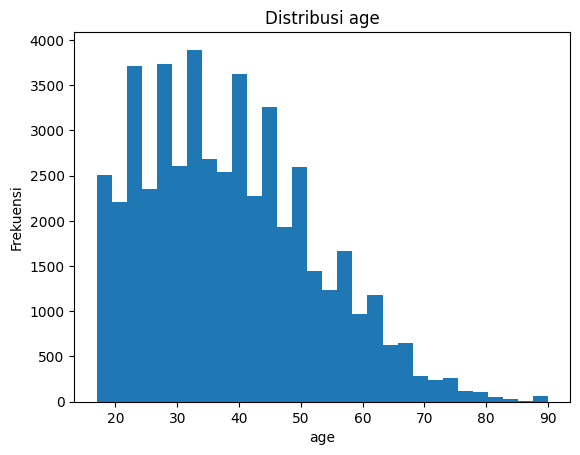

In [26]:
# Jawab 1.1 - Histrogram
num_cols = ['age']
for col in num_cols:
    plt.figure()
    plt.hist(df[col], bins=30)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col); plt.ylabel('Frekuensi')
    plt.show()

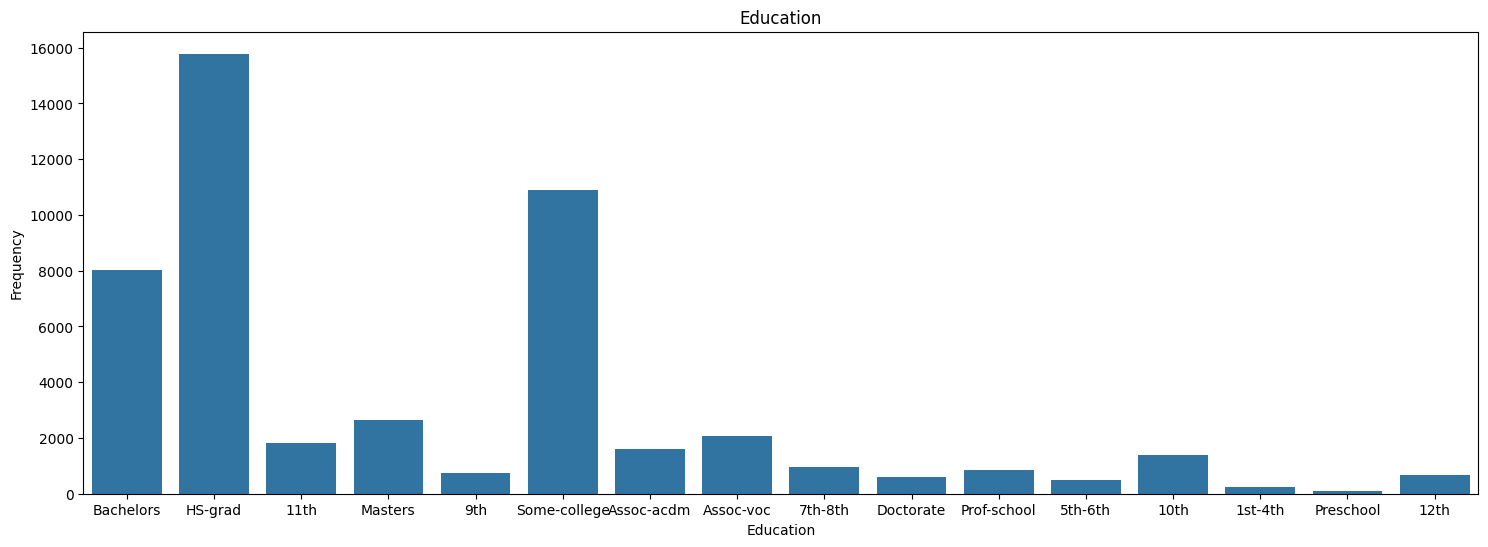

In [27]:
# Jawab 1.2 - Barchart
plt.figure(figsize=(18,6))
sns.countplot(data=df, x='education')
plt.title('Education')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.show()

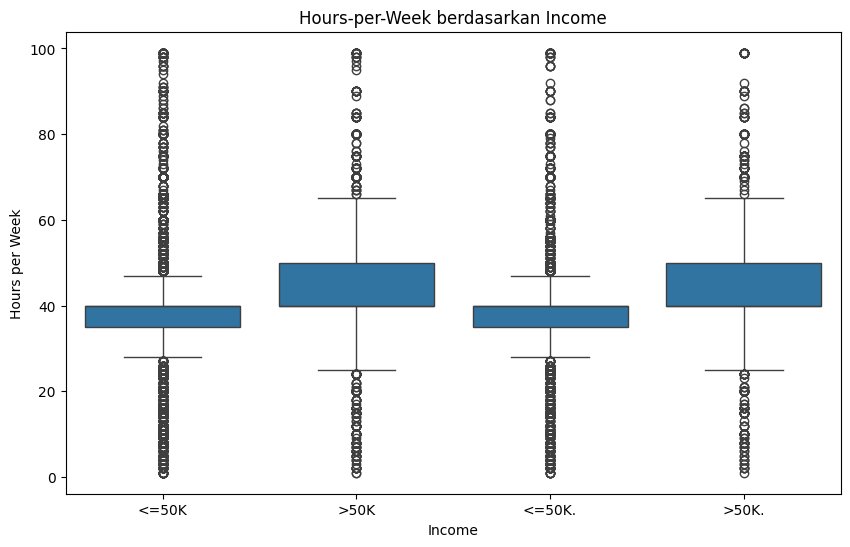

In [28]:
# Jawab 1.3 - Boxplot

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='income', y='hours-per-week')
plt.title('Hours-per-Week berdasarkan Income')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.show()

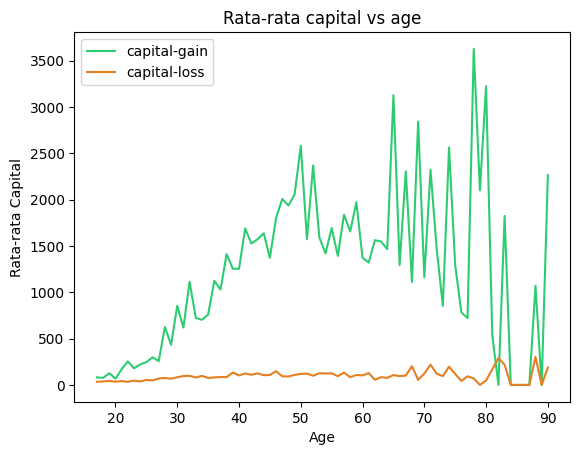

In [29]:
# Jawab 1.4 - Lineplot
g = df.groupby('age', as_index=False)[['capital-gain','capital-loss']].mean()
g = g.melt(id_vars='age', var_name='jenis', value_name='capital')

pal = {
    'capital-gain': '#2ecc71',
    'capital-loss': '#e67e22'
}

plt.figure()
sns.lineplot(data=g, x='age', y='capital', hue='jenis', palette=pal)
plt.title('Rata-rata capital vs age')
plt.xlabel('Age'); plt.ylabel('Rata-rata Capital')
plt.legend(title='')
plt.show()

## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [30]:
# Jawab dengan komentar python

'''
  Bisa dengan multiple comment
  seperti ini
'''

#1. Fenomena apa yang terjadi pada distribusi data 'age'?
'''
Distribusi age tampak menceng ke kanan (positively skewed), mayoritas data terkumpul pada rentang 20–50 tahun, lalu frekuensinya menurun dan membentuk ekor panjang ke usia yang lebih tua (hingga ±90).
Ini mengindikasikan banyak usia muda/dewasa, sedikit observasi usia lanjut (calon outlier), sehingga distribusi tidak normal/simetris.
'''
#2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
'''
Cek dulu seberapa banyak yang hilang dan apakah hilangnya acak atau cenderung pada kelompok tertentu. Karena sebaran umur miring ke kanan, isi nilai kosongnya dengan median.
'''

#3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

income_categories = df['income'].unique()

for category in income_categories:
    print(f"Analysis for Income Category: {category}")

    subset_df = df[df['income'] == category]

    Q1 = subset_df['hours-per-week'].quantile(0.25)
    Q3 = subset_df['hours-per-week'].quantile(0.75)
    IQR = Q3 - Q1

    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    outliers = subset_df[
        (subset_df['hours-per-week'] < lower_fence) |
        (subset_df['hours-per-week'] > upper_fence)
    ]

    print(f"➜ Jumlah Outlier ditemukan: {len(outliers)}")


Analysis for Income Category: <=50K
➜ Jumlah Outlier ditemukan: 7809
Analysis for Income Category: >50K
➜ Jumlah Outlier ditemukan: 510
Analysis for Income Category: <=50K.
➜ Jumlah Outlier ditemukan: 3897
Analysis for Income Category: >50K.
➜ Jumlah Outlier ditemukan: 271


# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [31]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [32]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

le = LabelEncoder() # membuat objek dari LabelEncoder
df['sex'] = le.fit_transform(df['sex']) # proses encoding
df['income'] = le.fit_transform(df['income']) # proses encoding

In [33]:
df[['sex', 'income']].head(10)

,sex,income
0,1,0
1,1,0
2,1,0
3,1,0
4,0,0
5,0,0
6,0,0
7,1,2
8,0,2
9,1,2


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

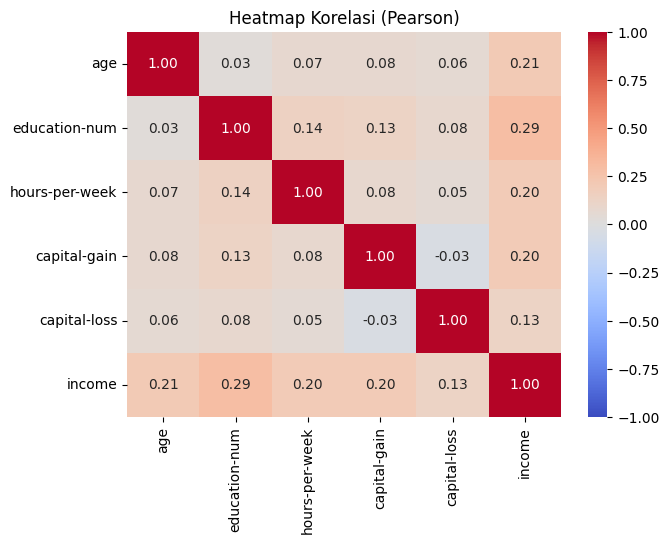

In [34]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

cols = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']

# Pastikan kolom ada & drop NA
d = df[cols].dropna()

# 1) Korelasi Pearson (default)
corr_pearson = d.corr(method='pearson')

plt.figure(figsize=(7,5))
sns.heatmap(corr_pearson, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Heatmap Korelasi (Pearson)")
plt.show()



In [35]:
# Hasil analisis jelaskan pada cell ini

'''
Heatmap menunjukkan korelasi positif namun lemah–sedang antara `income` (encoded) dengan beberapa fitur.
paling kuat pada education-num (~0.29), lalu capital-gain (~0.20) ≈ hours-per-week (0.20), dan age (~0.21); capital-loss paling lemah (~0.13).
Artinya, pendapatan tinggi cenderung terkait dengan pendidikan yang lebih lama, jam kerja lebih banyak, usia sedikit lebih tua,
dan adanya capital gain, tetapi hubungannya tidak kuat (banyak faktor lain berperan). Korelasi antarf fitur selain itu kecil (≈0.03–0.14),
sehingga multikolinearitas rendah dan fitur-fitur ini membawa informasi yang cukup berbeda. Ingat, ini korelasi Pearson (linear) pada data yang miring; uji Spearman bisa memberi gambaran tambahan.
'''

'\nHeatmap menunjukkan korelasi positif namun lemah–sedang antara `income` (encoded) dengan beberapa fitur. \npaling kuat pada education-num (~0.29), lalu capital-gain (~0.20) ≈ hours-per-week (0.20), dan age (~0.21); capital-loss paling lemah (~0.13). \nArtinya, pendapatan tinggi cenderung terkait dengan pendidikan yang lebih lama, jam kerja lebih banyak, usia sedikit lebih tua, \ndan adanya capital gain, tetapi hubungannya tidak kuat (banyak faktor lain berperan). Korelasi antarf fitur selain itu kecil (≈0.03–0.14), \nsehingga multikolinearitas rendah dan fitur-fitur ini membawa informasi yang cukup berbeda. Ingat, ini korelasi Pearson (linear) pada data yang miring; uji Spearman bisa memberi gambaran tambahan.\n'

# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [36]:
!pip install -q tensorflow

In [37]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


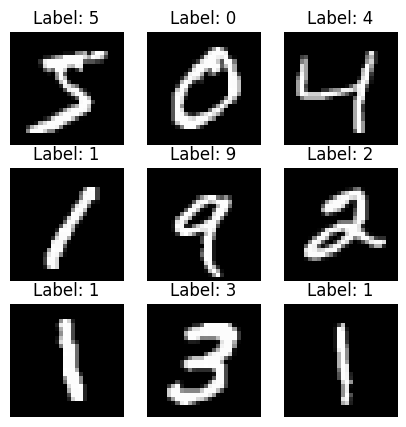

In [38]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

Test (upsampled) shape: (10000, 32, 32)


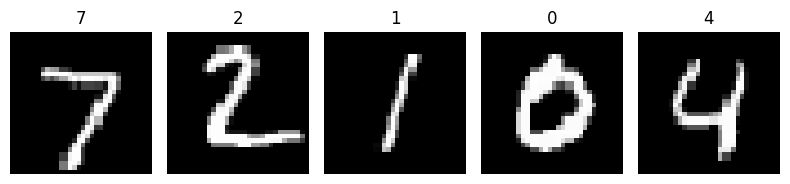

In [46]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

n_test = X_test.shape[0]
x_test_32 = np.empty((n_test, 32, 32), dtype=np.uint8)

x_test_tf = tf.convert_to_tensor(X_test[..., np.newaxis], dtype=tf.float32)
x_test_resized = tf.image.resize(x_test_tf, size=(32, 32), method='nearest')
x_test_resized = tf.squeeze(x_test_resized, axis=-1)
x_test_resized = tf.round(tf.clip_by_value(x_test_resized, 0, 255)).numpy().astype(np.uint8)

x_test_32[:] = x_test_resized

print("Test (upsampled) shape:", x_test_32.shape)

plt.figure(figsize=(8, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test_32[i], cmap="gray")
    plt.title(int(y_test[i]))
    plt.axis("off")
plt.tight_layout()
plt.show()


## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

Test norm: (10000, 32, 32) float32 0.0 1.0
SEBELUM normalisasi: shape= (10000, 32, 32) dtype= uint8 min= 0 max= 255
SESUDAH normalisasi: shape= (10000, 32, 32) dtype= float32 min= 0.0 max= 1.0


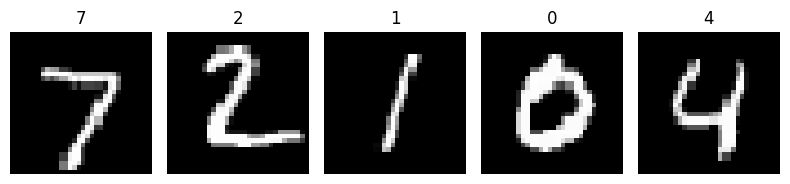

In [49]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

x_test_32_norm = x_test_32.astype(np.float32) / 255.0

print("Test norm:", x_test_32_norm.shape, x_test_32_norm.dtype,
      x_test_32_norm.min(), x_test_32_norm.max())

print("SEBELUM normalisasi:",
      "shape=", x_test_32.shape,
      "dtype=", x_test_32.dtype,
      "min=", x_test_32.min(),
      "max=", x_test_32.max())

print("SESUDAH normalisasi:",
      "shape=", x_test_32_norm.shape,
      "dtype=", x_test_32_norm.dtype,
      "min=", x_test_32_norm.min(),
      "max=", x_test_32_norm.max())

plt.figure(figsize=(8, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test_32_norm[i], cmap="gray", vmin=0, vmax=1)
    plt.title(int(y_test[i]))
    plt.axis("off")
plt.tight_layout()
plt.show()

## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [57]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan


X_test_normalized = x_test_32_norm


n_samples = X_test_normalized.shape[0]
h, w = X_test_normalized.shape[1], X_test_normalized.shape[2]
n_features = h * w
flatten_holder = np.empty((n_samples, n_features), dtype=np.float32)

flatten_holder[:] = X_test_normalized.reshape(n_samples, -1)

print("=== Informasi Bentuk Data ===")
print(f"Asli (3D)             : {X_test_normalized.shape}")
print(f"Flatten (2D)          : {flatten_holder.shape}")
print(f"Fitur per citra       : {flatten_holder.shape[1]} ({h}x{w} = {n_features})")
print(f"Citra pertama - shape asli    : {X_test_normalized[0].shape}")
print(f"Citra pertama - shape flatten : {flatten_holder[0].shape}")

=== Informasi Bentuk Data ===
Asli (3D)             : (10000, 32, 32)
Flatten (2D)          : (10000, 1024)
Fitur per citra       : 1024 (32x32 = 1024)
Citra pertama - shape asli    : (32, 32)
Citra pertama - shape flatten : (1024,)
